In [1]:
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Tour Stops
Number of Trips per Tour

## First Half Tour (Outbound)
Trips part of first tour leg (to primary destination).

### All Purposes

In [4]:
fname = 'tour_stops_outbound'
df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))

df_model['source'] = 'Model'
df_survey['source'] = 'Survey'
df = df_model.append(df_survey)

source,Model,Survey
tripsh1,,
1,84.30%,79.33%
2,12.28%,13.70%
3,2.56%,4.51%
4,0.57%,1.16%
5,0.19%,0.57%


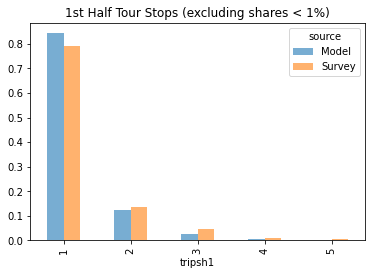

In [5]:
pd.options.display.float_format = "{:,.2%}".format
_df = df.assign(tripsh1 = lambda df: df.tripsh1.astype(int).astype(str)).pivot_table(index='tripsh1', columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df.plot(kind='bar', alpha=0.6, title='1st Half Tour Stops (excluding shares < 1%)')
for col in ['Model','Survey']:
    _df[col] = _df[col].apply(format_percent)
_df

## City of SeaTac

City of SeaTac
source   subarea_flag  Model  Survey
tripsh1                             
1                   1  1.80%   0.82%


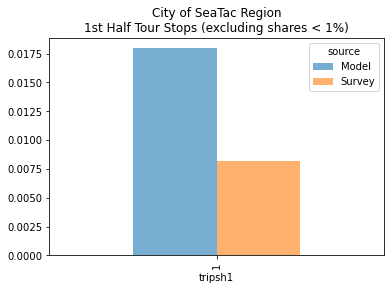

In [6]:
index_map = {0:'Other', 1:'City of SeaTac'}
_df = df.rename(columns={'person_subarea':'subarea_flag'}).assign(tripsh1 = lambda df: df.tripsh1.astype(int).astype(str)).pivot_table(index=['subarea_flag','tripsh1'], columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df = _df.reset_index(level='subarea_flag')

for county, df_county in _df.groupby('subarea_flag'):
    if county==1:
        print(index_map.get(int(county)))
        df_county.drop(columns='subarea_flag').plot(kind='bar', alpha=0.6, title=index_map.get(int(county)) + ' Region\n1st Half Tour Stops (excluding shares < 1%)')
        print(df_county)

## Other

Other
source   subarea_flag  Model  Survey
tripsh1                             
1                   0 82.50%  78.51%
2                   0 12.01%  13.61%
3                   0  2.50%   4.48%
4                   0  0.56%   1.12%
5                   0  0.18%   0.57%


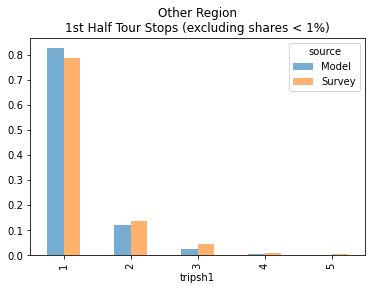

In [7]:
for county, df_county in _df.groupby('subarea_flag'):
    if county!=1:
        print(index_map.get(int(county)))
        df_county.drop(columns='subarea_flag').plot(kind='bar', alpha=0.6, title=index_map.get(int(county)) + ' Region\n1st Half Tour Stops (excluding shares < 1%)')
        print(df_county)

### By Purpose

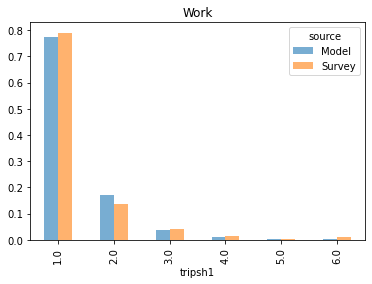

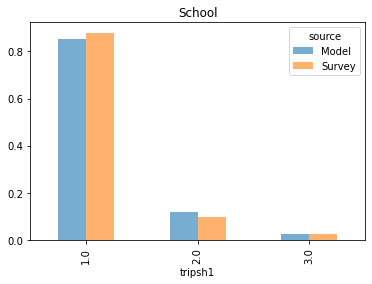

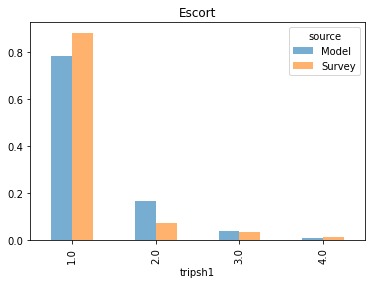

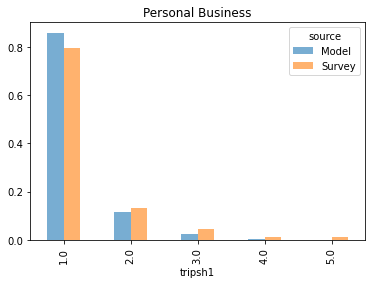

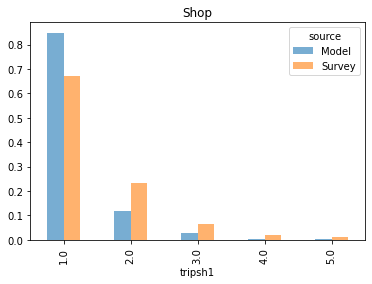

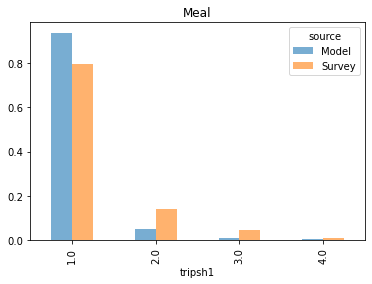

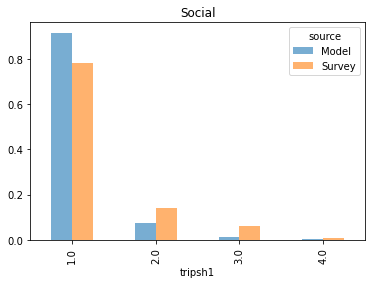

In [8]:
for purp in df['pdpurp'].unique():
    _df = df[df['pdpurp'] == purp]
    _df = _df.pivot_table(index='tripsh1', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)


## City of SeaTac

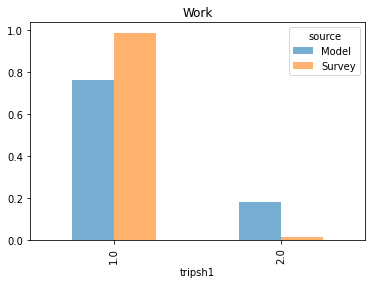

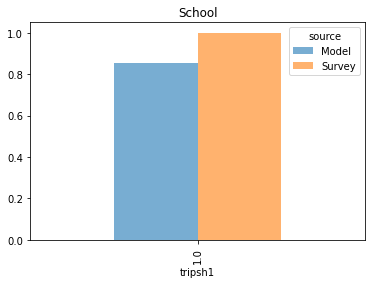

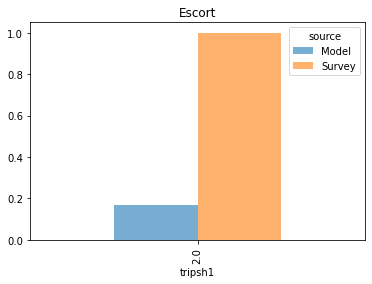

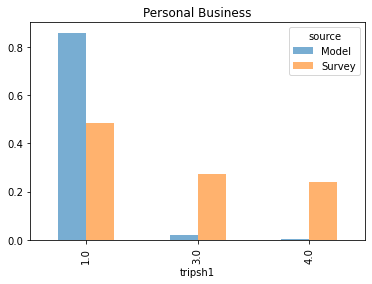

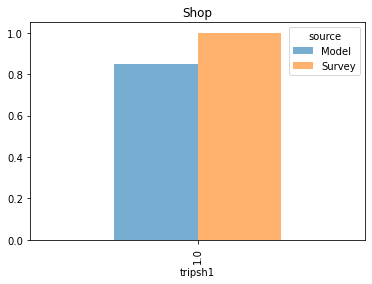

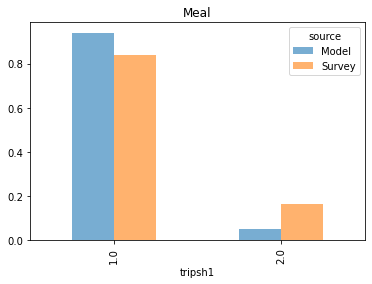

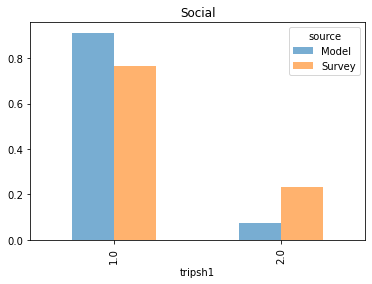

In [9]:
for purp in df['pdpurp'].unique():
    _df = df[(df['pdpurp'] == purp) & (df['person_subarea']==1)]
    _df = _df.pivot_table(index='tripsh1', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)

## Other

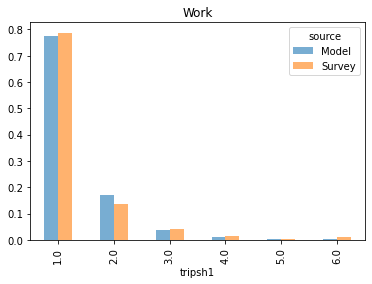

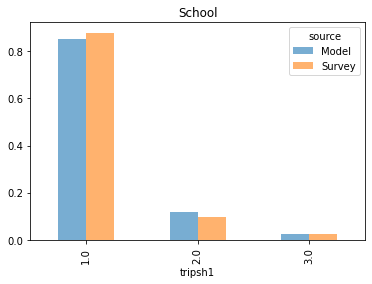

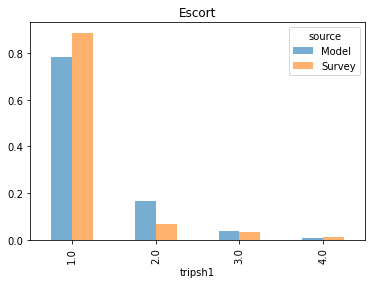

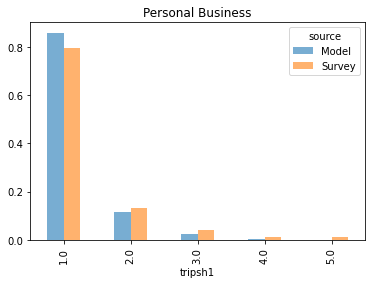

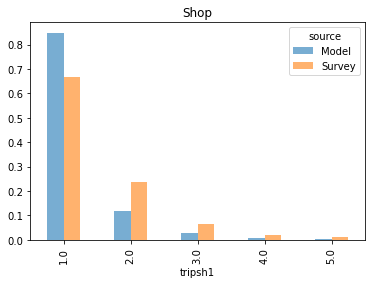

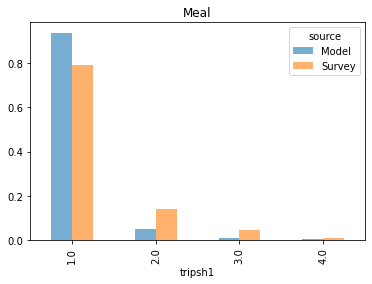

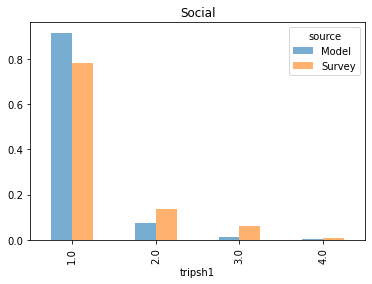

In [10]:
for purp in df['pdpurp'].unique():
    _df = df[(df['pdpurp'] == purp) & (df['person_subarea'] != 1)]
    _df = _df.pivot_table(index='tripsh1', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)

## Second Half Tour (Return/Inbound)

### All Purposes

source,Model,Survey
tripsh2,,
1,74.57%,71.05%
2,19.18%,18.90%
3,4.85%,5.81%
4,0.96%,2.45%
5,0.28%,1.03%


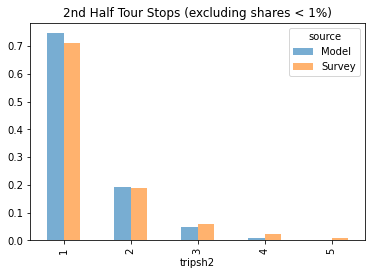

In [11]:
_df = df.assign(tripsh2 = lambda df: df.tripsh2.astype(int).astype(str)).pivot_table(index='tripsh2', columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df.plot(kind='bar', alpha=0.6, title='2nd Half Tour Stops (excluding shares < 1%)')
for col in ['Model','Survey']:
    _df[col] = _df[col].apply(format_percent)
_df

## City of SeaTac

City of SeaTac
source   subarea_flag  Model  Survey
tripsh2                             
1                   1  1.59%   0.85%
2                   1  0.42%   0.11%


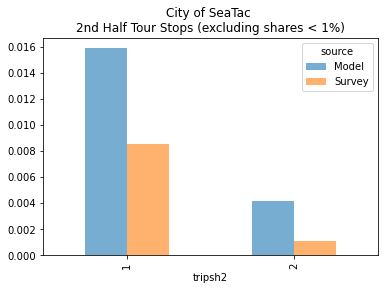

In [12]:
_df = df.rename(columns={'person_subarea':'subarea_flag'}).assign(tripsh2 = lambda df: df.tripsh2.astype(int).astype(str)).pivot_table(index=['subarea_flag','tripsh2'], columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df = _df.reset_index(level='subarea_flag')

for county, df_county in _df.groupby('subarea_flag'):
    if county==1:
        print(index_map.get(int(county)))
        df_county.drop(columns='subarea_flag').plot(kind='bar', alpha=0.6, title=index_map.get(int(county)) + ' \n2nd Half Tour Stops (excluding shares < 1%)')
        print(df_county)

## Other

Other
source   subarea_flag  Model  Survey
tripsh2                             
1                   0 72.98%  70.20%
2                   0 18.76%  18.79%
3                   0  4.74%   5.79%
4                   0  0.93%   2.45%
5                   0  0.28%   1.03%


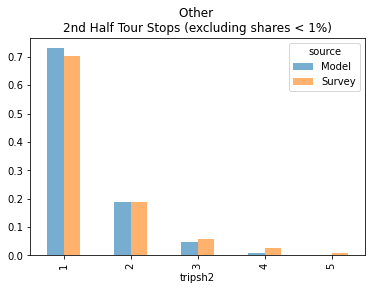

In [13]:
for county, df_county in _df.groupby('subarea_flag'):
    if county!=1:
        print(index_map.get(int(county)))
        df_county.drop(columns='subarea_flag').plot(kind='bar', alpha=0.6, title=index_map.get(int(county)) + ' \n2nd Half Tour Stops (excluding shares < 1%)')
        print(df_county)

### By Purpose

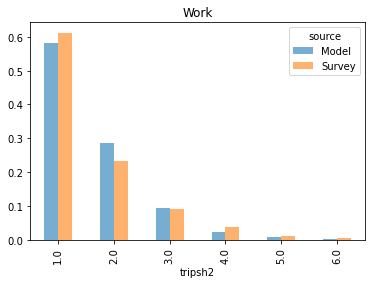

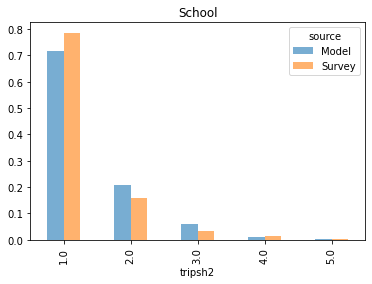

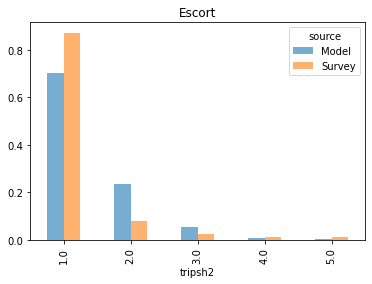

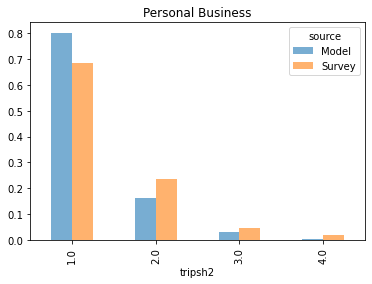

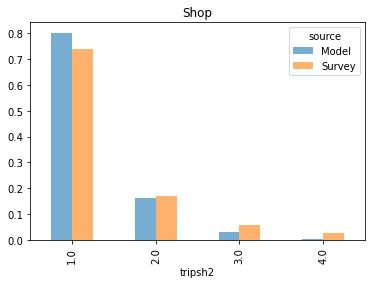

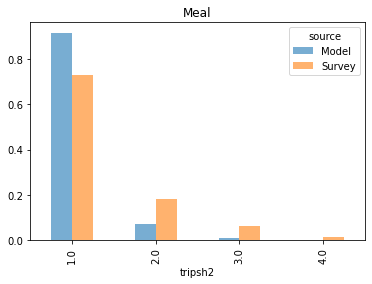

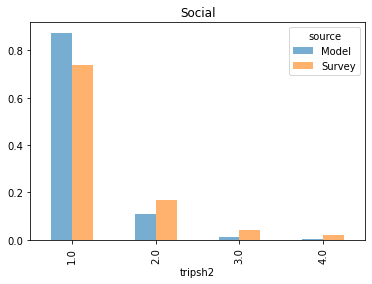

In [14]:
for purp in df['pdpurp'].unique():
    _df = df[(df['pdpurp'] == purp)]
    _df = _df.pivot_table(index='tripsh2', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)

## City of SeaTac

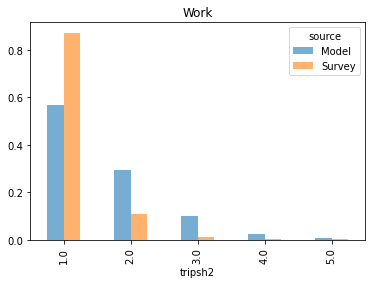

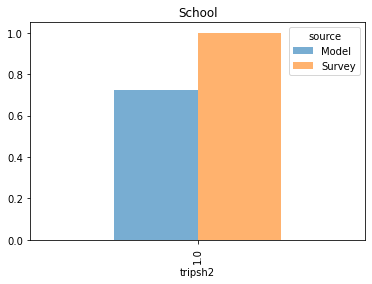

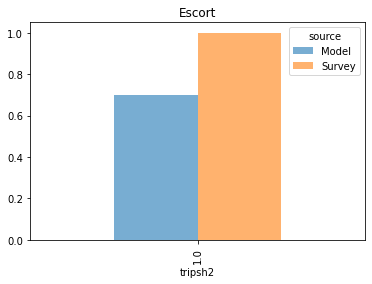

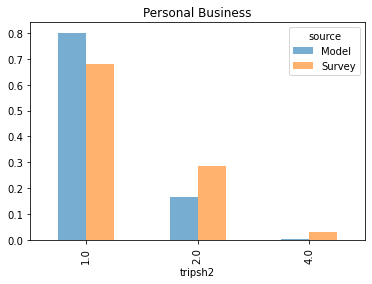

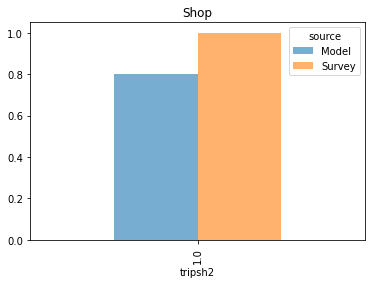

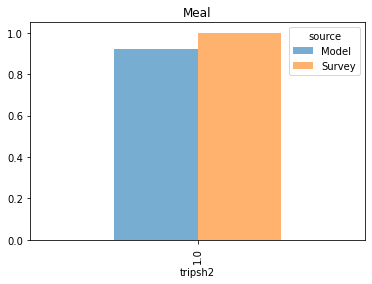

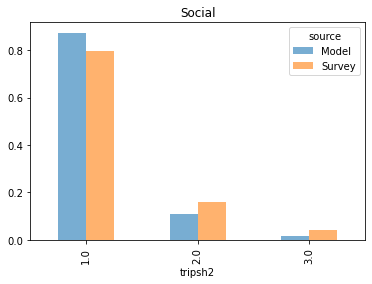

In [15]:
for purp in df['pdpurp'].unique():
    _df = df[(df['pdpurp'] == purp) & (df['person_subarea'] == 1)]
    _df = _df.pivot_table(index='tripsh2', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)


## Other

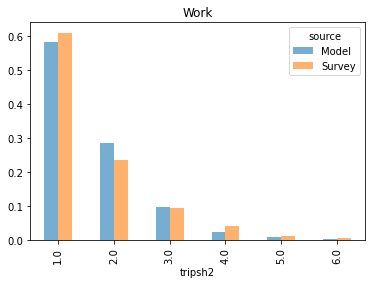

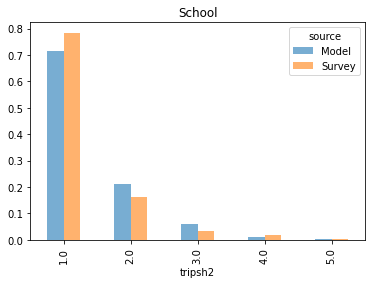

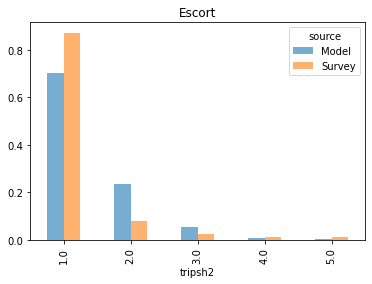

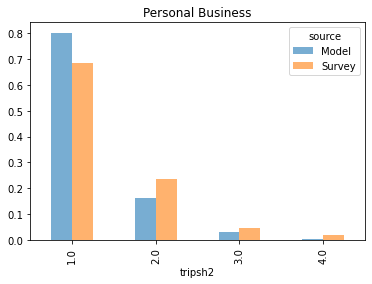

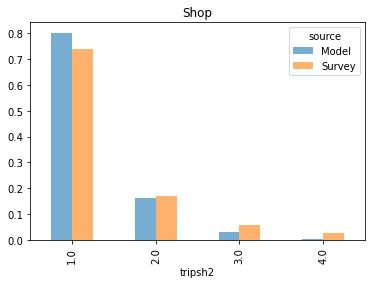

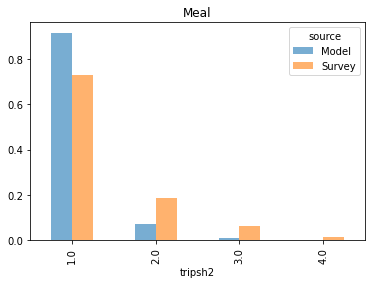

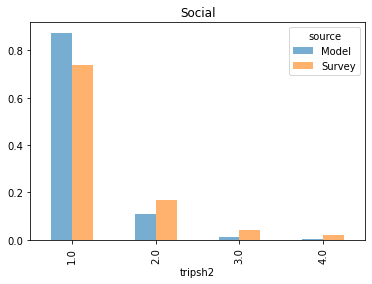

In [16]:
for purp in df['pdpurp'].unique():
    _df = df[(df['pdpurp'] == purp) & (df['person_subarea'] != 1)]
    _df = _df.pivot_table(index='tripsh2', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)


# All Stops

### All Purposes

source,Model,Survey
all_stops,,
2,66.25%,59.76%
3,20.66%,21.30%
4,8.57%,9.46%
5,2.88%,5.06%
6,1.00%,1.78%
7,0.33%,1.07%
8,0.12%,0.80%


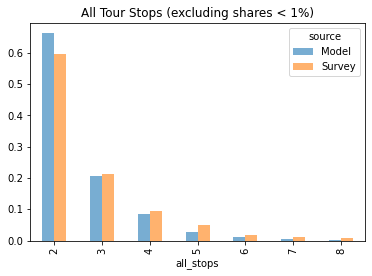

In [17]:
df['all_stops'] = (df['tripsh1'] + df['tripsh2']).astype(int).astype(str)
_df = df.pivot_table(index='all_stops', columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df.plot(kind='bar', alpha=0.6, title='All Tour Stops (excluding shares < 1%)')
for col in ['Model','Survey']:
    _df[col] = _df[col].apply(format_percent)
_df

## City of SeaTac

City of SeaTac
source     Model  Survey
all_stops               
2          1.40%   0.74%
3          0.45%   0.15%


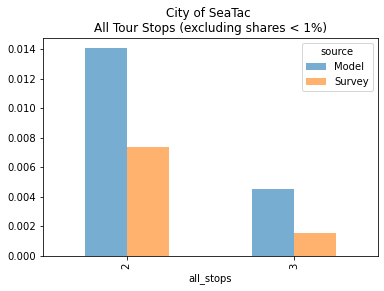

In [18]:
_df = df.rename(columns={'person_subarea':'subarea_flag'}).assign(all_stops = lambda df: df.all_stops.astype(int).astype(str)).pivot_table(index=['subarea_flag','all_stops'], columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df = _df.reset_index(level='subarea_flag')

for county, df_county in _df.groupby('subarea_flag'):
    if county==1:
        print(index_map.get(int(county)))
        df_county.drop(columns='subarea_flag').plot(kind='bar', alpha=0.6, title=index_map.get(int(county)) + ' \nAll Tour Stops (excluding shares < 1%)')
        print(df_county.drop(columns='subarea_flag'))

## Other

Other
source     Model  Survey
all_stops               
2         64.84%  59.03%
3         20.21%  21.15%
4          8.38%   9.46%
5          2.82%   4.98%
6          0.98%   1.78%
7          0.32%   1.07%
8          0.12%   0.80%


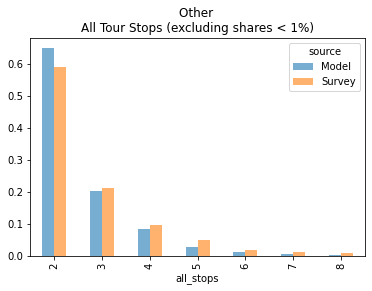

In [19]:
for county, df_county in _df.groupby('subarea_flag'):
    if county!=1:
        print(index_map.get(int(county)))
        df_county.drop(columns='subarea_flag').plot(kind='bar', alpha=0.6, title=index_map.get(int(county)) + ' \nAll Tour Stops (excluding shares < 1%)')
        print(df_county.drop(columns='subarea_flag'))

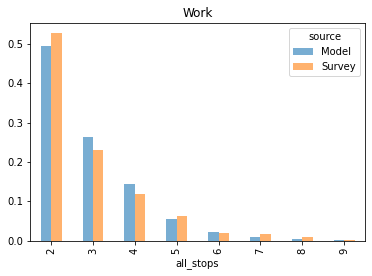

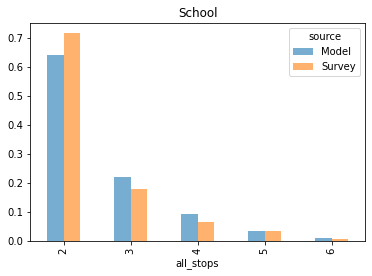

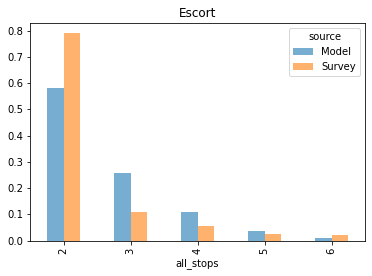

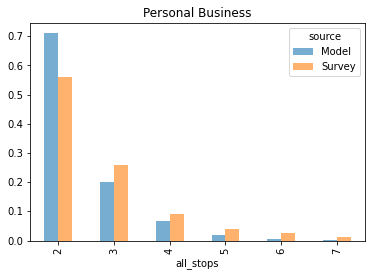

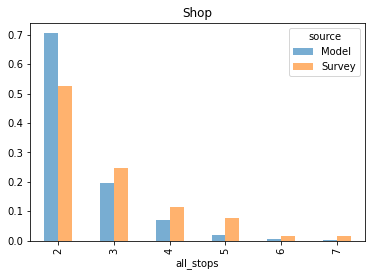

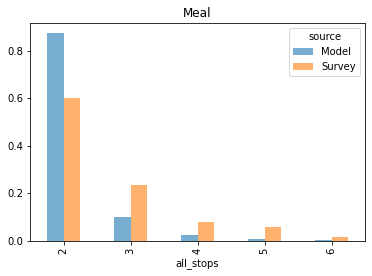

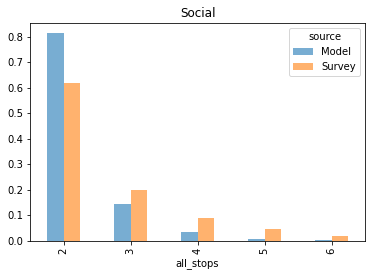

In [20]:
for purp in df['pdpurp'].unique():
    _df = df[df['pdpurp'] == purp]
    _df = _df.pivot_table(index='all_stops', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)


## City of SeaTac

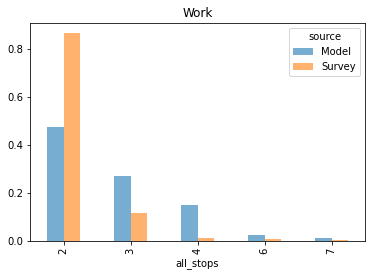

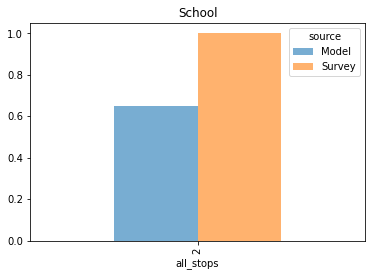

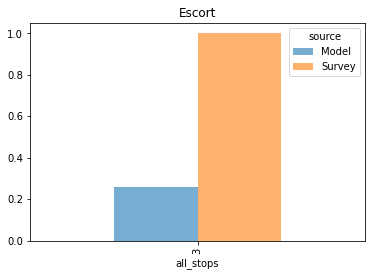

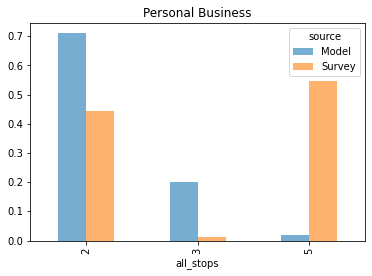

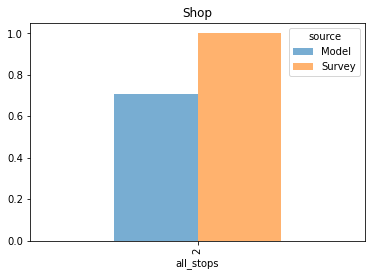

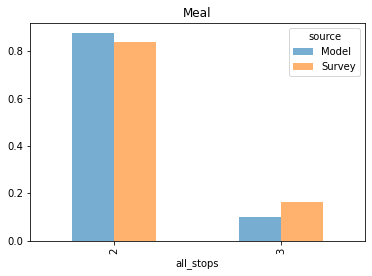

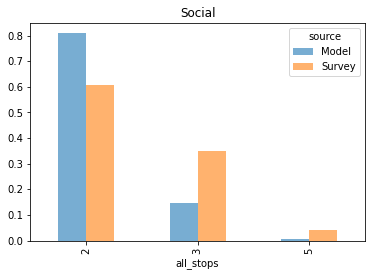

In [21]:
for purp in df['pdpurp'].unique():
    _df = df[(df['pdpurp'] == purp) & (df['person_subarea'] == 1)]
    _df = _df.pivot_table(index='all_stops', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)

## Other

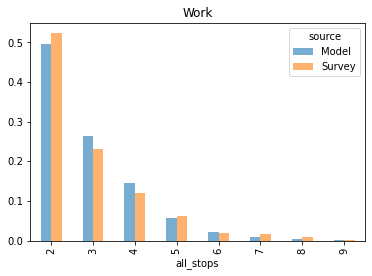

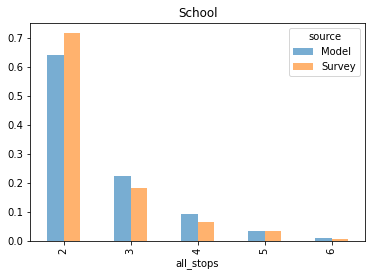

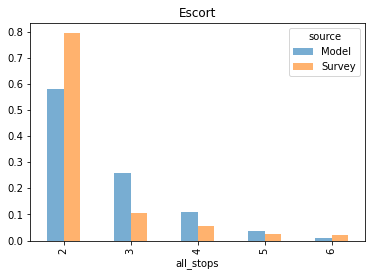

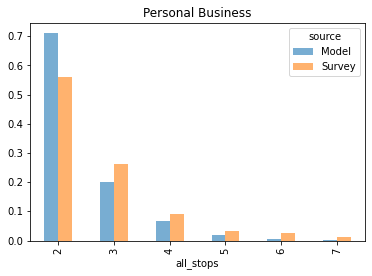

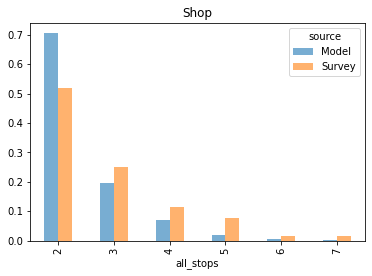

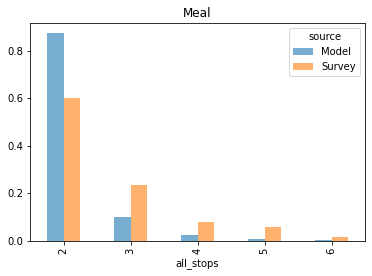

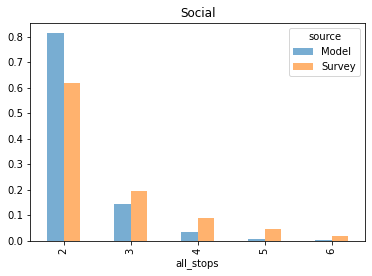

In [22]:
for purp in df['pdpurp'].unique():
    _df = df[(df['pdpurp'] == purp) & (df['person_subarea'] != 1)]
    _df = _df.pivot_table(index='all_stops', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)